Importing necessary Library

In [79]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

Load the Dataset

In [80]:
dataset=sns.load_dataset("iris")
print(dataset.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Steps in hypothesis Testing
<ul><li>Formulating hypothesis</li>
Null Hypothesis(H0)=There is no significant difference between the population mean and sample mean regarding the sepal_length for versicolor<br>
Alternative Hypothesis(H<sub>a</sub>)=There is significant difference the population mean and sample mean regarding the sepal_length for versicolor
<li>Selecting Significance Level(alpha)=5%</li>
<li>Checking the assumption of data</li>


50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
Name: sepal_length, dtype: float64


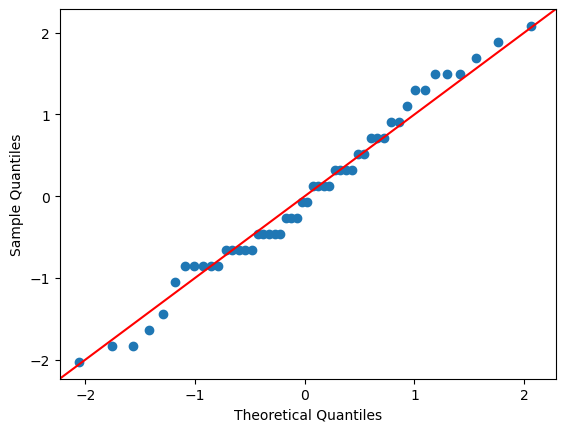

ShapiroResult(statistic=0.9346526514349606, pvalue=0.3198536118643621)


In [81]:
df=dataset[dataset['species']=="versicolor"]["sepal_length"]
print(df.head())
sample_data=df.sample(15)
#Checking the normality of data using qq-plot
fig=sm.qqplot(df,line='45',fit=True)
plt.show()
#Checking the normality using Shapiro-Wilk test
shapiro_data=stats.shapiro(sample_data)
print(shapiro_data)

Based on the assumption and due to the absence of population standard deviation we are conducting  the Single Sample t-test

In [82]:
t_statistics,p_value=stats.ttest_1samp(sample_data,df.mean())
print("t_statistics:",t_statistics,"\n","p_value:",p_value)

t_statistics: 0.672841578288435 
 p_value: 0.5120019402739957


Decision:At 5% lvl of significance

In [83]:
alpha=5/100
if(p_value>alpha):
    print("Accept Null Hypothesis and rejct alternative hypothesis")
else:
    print("Accept Alternative hypothesis and reject null hypothesis")

Accept Null Hypothesis and rejct alternative hypothesis


Evidence:

In [84]:
print(df.mean())
print(sample_data.mean())

5.936
5.999999999999999


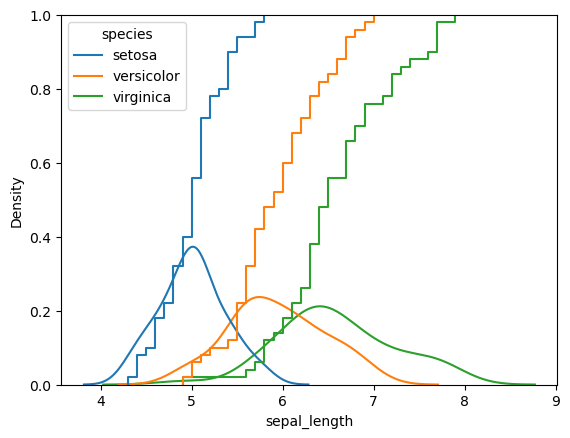

In [85]:
#Data Visulaization
sns.kdeplot(data=dataset,x='sepal_length',hue='species')
sns.ecdfplot(data=dataset,x='sepal_length',hue='species')
plt.show()